<a href="https://colab.research.google.com/github/lucassmacedo/titanic-challenge-classification/blob/master/Titanic_Classification_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*by [Lucas Macedo](https://www.linkedin.com/in/lucassmacedo//)*

---

# Análise dos sobreviventes do desastre Titanic 2.0

A idéia desta análise é trazer insights sobre os dados dos sobreviventes do Titanic e criar um modelo que faça a predição dos sobreviventes.


<center><img alt="Mapa do RJ" width="40%" src="https://ichef.bbci.co.uk/news/640/cpsprodpb/15A5F/production/_115017688_c6122844-332e-4516-a812-e56991e9374a.jpg"></center>




### **Obtenção dos Dados**

Os dados usados nesse projeto, foram retirados diretamente do portal de dados aberto do [Kaggle](https://www.kaggle.com/c/titanic/data)  





## Importando as bibliotecas

In [ ]:
#Algebra Linear
import numpy as np 

# Processamento/manipulação dos dados
import pandas as pd 

# Visualização dos dados
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#Algoritimos Machine Learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_val_predict


In [ ]:
# Iniciando os dados de Treino e Teste
test_df = pd.read_csv('https://raw.githubusercontent.com/lucassmacedo/titanic-challenge-classification/master/test.csv')
train_df = pd.read_csv('https://raw.githubusercontent.com/lucassmacedo/titanic-challenge-classification/master/train.csv')

## Exploração/Análise de Dados

---



In [ ]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


O conjunto de treinamento tem 891 exemplos e 11 características + a variável de destino (Survived).


###Dicionário de variáveis

*  **Survived**: Se sobreviveu ou não
*  **Pclass**: Ticket de classe(Status socio-econômico)
*  **Name** = Nome
*  **Sex**: Sexo
*  **Age**: Idade
*  **SibSp**: Número de irmãos/irmãs ou cônjuges abordo
*  **Parch**: Número de pais ou crianças abordo
*  **Ticket**: Número do Ticket
*  **Fare**: Tarifa paga
*  **Cabin**: Número da cabine
*  **Embarked**: Porta de embarque

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Acima podemos ver que 38% do conjunto de treinamento sobreviveu ao Titanic. Também podemos ver que as idades dos passageiros variam de 0,4 a 80. Além disso, já podemos detectar alguns recursos que contêm valores ausentes, como o recurso "Age".



In [ ]:
train_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Analisando o dataset, percebemos que precisamos converter muitos valores para números/binário, para que os algoritmos de Machine Learning possam processá-los. Além disso, podemos ver que algumas colunas têm intervalos muito distante, que precisaremos converter para a mesma escala. Também podemos detectar mais algumas colunas que contêm Missing Values, que precisam ser tratados.

In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


A Coluna **Embarked** tem apenas dois valores ausentes, que podem ser facilmente preenchidos. Será muito mais complicado lidar com o recurso 'Age', que tem 177 valores em falta. O recurso '**Cabin**' precisa de uma analise mais aprofundada pois 77% dele está faltando.



In [ ]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Acima temos 11 colunas + a coluna de destino (Survived).
**A Principal pergunta seria: Quais colunas são essenciais para definir a taxa de sobrevivencia?**

Percebemos que todas tem importancia, porem as que possivelmente tem menos impacto são : ** 'PassengerId', 'Ticket' e 'Name'**

**1. Idade e Sexo:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

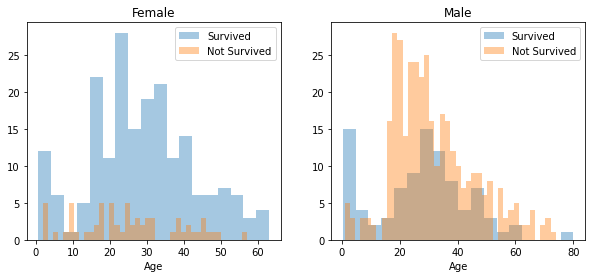

In [ ]:
#Definimos os labels
survived = 'Survived'
not_survived = 'Not Survived'

# definindo a estrutura do plot
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

# filtramos os homens e mulheres
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']

# Montamos o plot com Idade de todas as mulheres que Sobrevieram e  Não sobreviveram
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')


# Montamos o plot com Idade de todas as Homens que Sobrevieram e  Não sobreviveram
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Pela análise que fizemos acima percebemos que homens têm uma muito mais probabliidade de sobrevivência quando têm entre 18 e 30 anos.Para as mulheres também percebemos que a chance  de sobrevivência são maiores entre 14 e 40 anos.

Percebemos também que para homens a probabilidade de sobrevivência é muito baixa entre 5 e 18 anos, porem para as mulheres esse probabilidade muda. 

Percebemos que a classica fala do filme "Mulheres e crianças primeiro" se faz verdade em nossa análise.

**3. Embarcação, Classes de bilhetes e Sexo:**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


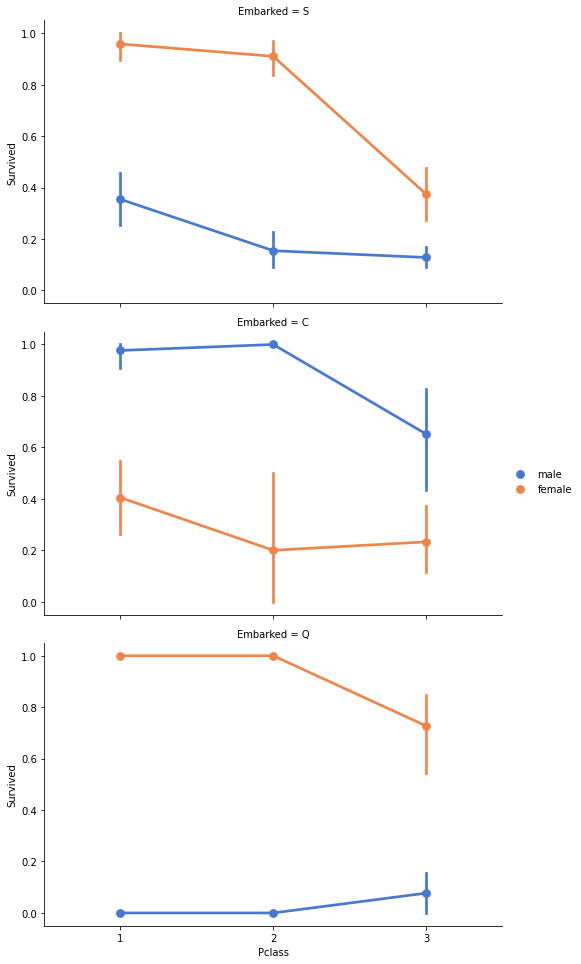

In [ ]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette="muted",  order=None, hue_order=None )
FacetGrid.add_legend()

Percebemos que **Embarked** dos sobreviventes é relativo ao Sexo.


As mulheres no Portão Q e no portão S têm mais chance de sobreviver. Os homens tem mais chanse de sobreviver  se estiverem no portão C, e menos chanse se estiverem no portão Q ou S.

**4. Pclass:**

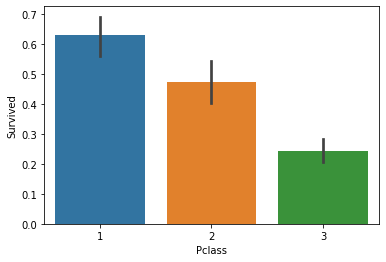

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train_df)


Aqui vemos uma varaivel que tem um peso consideravel na taxa de sobrevivencia, claramente as chances de sobrevicencia da Class 1 é bem maior que da classe 2 e 3.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


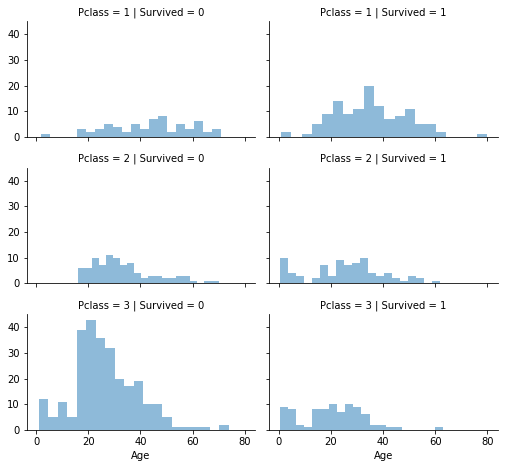

In [ ]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

O gráfico acima confirma a analise de que os passageiros da Class 1, tem maiores chances de sobrevivencia do que os passageiros da Class 2 e 3.



## Pré-Processamento de Dados

In [ ]:
train_df = train_df.drop(['PassengerId'], axis=1)

train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

### Dados Ausentes:
**Age**:
Agora vamos para a coluna Idade, este campo eu escolhi preencher da seguinte forma: Mulheres = Média de Mulheres, Homens = Média de Homens.





In [ ]:
data = [train_df, test_df]

for dataset in data:
  media_mulheres = dataset[dataset['Sex'] == 'female']['Age'].median();
  dataset.loc[dataset['Sex'] == 'female','Age'] = dataset.loc[dataset['Sex'] == 'female','Age'].fillna(media_mulheres);

  media_homens = dataset[dataset['Sex'] == 'male']['Age'].median();
  dataset.loc[dataset['Sex'] == 'male','Age'] = dataset.loc[dataset['Sex'] == 'male','Age'].fillna(media_homens)


In [ ]:
train_df["Age"].isnull().sum()

0

**Embarked**
Como a coluna Embarked tem apenas dois valores ausentes, vamos usar a "moda" para preencher esse campo, ou seja, o valor que mais se repete.

In [ ]:
train_df['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
for dataset in data:
  fare_mean = dataset['Fare'].mean(); 
  dataset['Fare'] = dataset['Fare'].fillna(fare_mean)


## Convertendo os Parametros:

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Acima vemos que  '**Fare**' é um float e nós temos que lidar com 4 características categóricas: **Sex e Embarked**.


**Sexo**, agora converteremos  **Sex** em binário.

In [ ]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

**Embarked**: agora converteremos **Embarked** para númerico.

In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

Fare: agora converteremos o valor da tarifa

## Criação dos Modelos de Machine Learning

In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

**Stochastic Gradient Descent (SGD) Learning**

In [ ]:
# https://scikit-learn.org/stable/modules/sgd.html
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


print(round(acc_sgd,2,), "%")

70.93 %


**Random Forest**

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

97.76 %


**Logistic Regression**

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

80.25 %


**KNN**

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

83.73 %


**Gaussian Naive Bayes** 

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

79.24 %


**Perceptron**

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
perceptron = Perceptron(max_iter=200)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

63.08 %


**Multi Layer Perceptron**

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
mlp = MLPClassifier(max_iter=200)
mlp.fit(X_train, Y_train)

Y_pred = mlp.predict(X_test)

acc_mlp = round(mlp.score(X_train, Y_train) * 100, 2)
print(round(acc_mlp,2,), "%")

82.27 %


**Linear SVC**

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
linear_svc = LinearSVC(max_iter=1000)
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

76.77 %


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Decision Tree**

In [ ]:
# https://scikit-learn.org/stable/modules/tree.html
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

97.76 %


### Avaliando os modelos

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Multi Layer Perceptron',
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, acc_mlp,
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
97.76,Random Forest
97.76,Decision Tree
83.73,KNN
82.27,Multi Layer Perceptron
80.25,Logistic Regression
79.24,Naive Bayes
76.77,Support Vector Machines
70.93,Stochastic Gradient Decent
63.08,Perceptron


Como podemos ver o algoritmo **Random Forest** e **Decision Trees** foram os modelos com melhor performance.

### Avaliando Adicional

In [ ]:
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)

#### Montando a Matriz de Confusão

Tabela que mostra as frequências de classificação para cada classe do modelo (Taxas de erros e acertos)

**Verdadeiro positivo** (true positive — TP): ocorre quando no conjunto real, a classe que estamos buscando foi prevista corretamente. Por exemplo, quando o passagueiro não sobreviveu no naufrágio e o modelo previu corretamente.

**Falso positivo** (false positive — FP): ocorre quando no conjunto real, a classe que estamos buscando prever foi prevista incorretamente. Exemplo: o passageiro não sobreviveu no naufrágio e o modelo disse que sobreviveu.

**Falso verdadeiro** (true negative — TN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista corretamente. Exemplo: o passageiro não sobreviveu e o modelo previu corretamente que ele não sobreviveu.

**Falso negativo** (false negative — FN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista incorretamente. Por exemplo, quando o passageiro não sobreviveu e o modelo previu errado dizendo que ele sobreviveu.

              precision    recall  f1-score   support

Not Survived       0.84      0.85      0.84       549
    Survived       0.75      0.73      0.74       342

    accuracy                           0.80       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



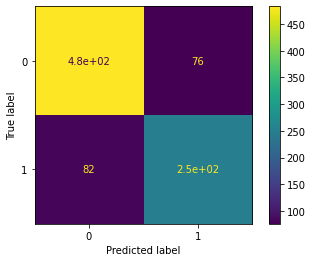

In [ ]:
# Montamos a Matriz de Confusão
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(decision_tree, X_train, predictions)  
# Last thing: evaluation of algorithm performance in classifying flowers
c_matrix = confusion_matrix(Y_train,predictions)
tn, fp, fn, tp = c_matrix.ravel()
print(classification_report(Y_train ,predictions,target_names =['Not Survived','Survived']))

Agora com a nossa matriz de confusão montada, vamos entender o que os números dizem.

In [ ]:
print("TP: ",tp)
print("FN: ",fn)
print("TN: ",tn)
print("FP: ",fp)

TP:  250
FN:  92
TN:  467
FP:  82


## **Recall** 
responde a seguinte perguta: Qual a proporção de positivos foi identificados corretamente?
É calculado pela seguinte formula.

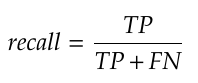

O Cálculo é definido como a razão entre verdadeiros positivos sobre a soma de verdadeiros positivos com negativos falsos.

In [ ]:
recall = tp / (tp + fn)
recall

0.7309941520467836

Isso quer dizer que o nosso modelo acerta 0.56% como verdadeiro os resultados que são verdadeiros, ou seja é um modelo fraco ainda, nosso modelo só consegue acertar 0.56%.


## **Precisão**

Também responde a outra pergunta: Qual a proporção de identificações positivas foi realmente correta ou quão bem meu modelo trabalhou. É calculado pela seguinte formula.

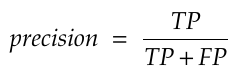

O Cálculo é definido como a razão entre verdadeiros positivos sobre a soma de verdadeiros positivos com  falsos.

In [ ]:
precision = tp / (tp + fp)
precision

0.7530120481927711

Isso quer dizer que o nosso modelo tem uma precisão de 0.80%, ou seja nosso modelo classificou corretamente 0.80% dos sobreviventes do Naufrágio.

## **Acurácia** 
Diz quanto o meu modelo acertou das previsões possíveis de Positivos e Negativos corretamente. É calculado pela seguinte formula.

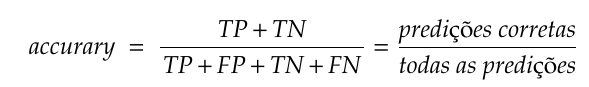


In [ ]:
acurracy = ( tp + tn ) / (tp + fp + tn + fn)
acurracy

0.8047138047138047

Isso nos mostra que o nosso modelo é razoavelmente bom em **prever** e **acertar** o previsto. Seja o sobrevivente (True or False)


## **F-Score**
É média harmônica entre Precisão e Recall, Sua fórmula é:

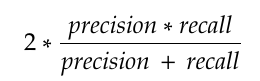

A Idéia base do F-Score é indicar uma média que mostre a qualidade geral do seu modelo

In [ ]:
fscore  = 2 * ((precision * recall) / (precision + recall))
fscore

0.741839762611276

**Precision Recall Curve**

Para cada pessoa que nosso algoritmo **Random Forest** precisar classificar, ele calcula uma probabilidade baseada em uma função e classifica a pessoa como sobrevivente (quando a pontuação é maior do que o limite) ou como não sobrevivente (quando a pontuação é menor que o limite).

In [ ]:
from sklearn.metrics import precision_recall_curve

# Obtendo as probabilidades de nossas previsões
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

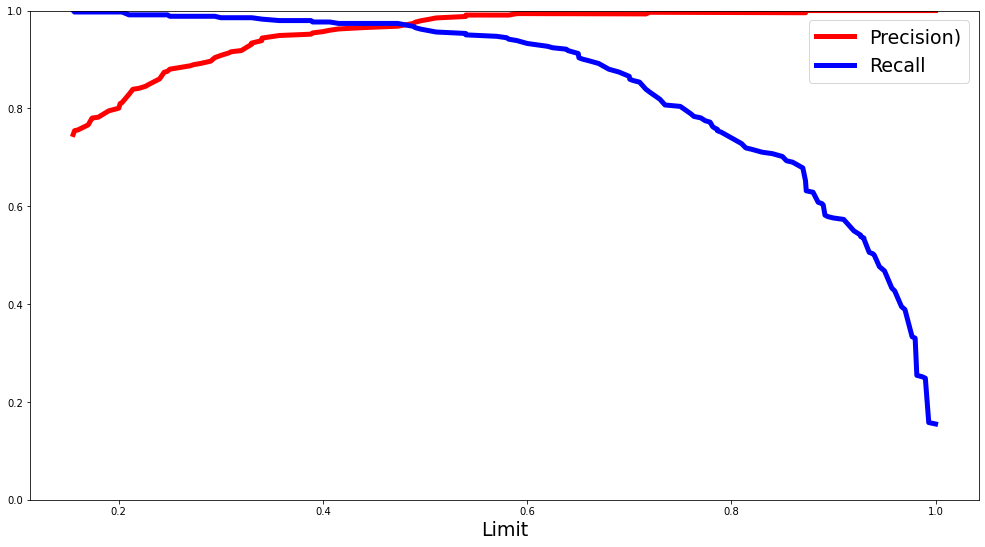

In [ ]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="Precision)", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="Recall", linewidth=5)
    plt.xlabel("Limit", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(17, 9))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Acima podemos ver claramente que o **Recall** está caindo consideravelmente com uma **precision** de 85%. Por causa disso, você pode querer selecionar a troca de **precision / recall** antes disso - talvez em torno de 75%

Agora você pode escolher um **limit**, que oferece a melhor compensação de **precision / recall** para seu problema atual de ML. Se você quiser, por exemplo, uma **precision** de 80%, você pode facilmente olhar para os gráficos e ver que você precisaria de um **limit** de cerca de 0,4. Então poderiamos treinar um modelo com exatamente esse limite e obteria a precisão desejada.

**Recall vs Precision**

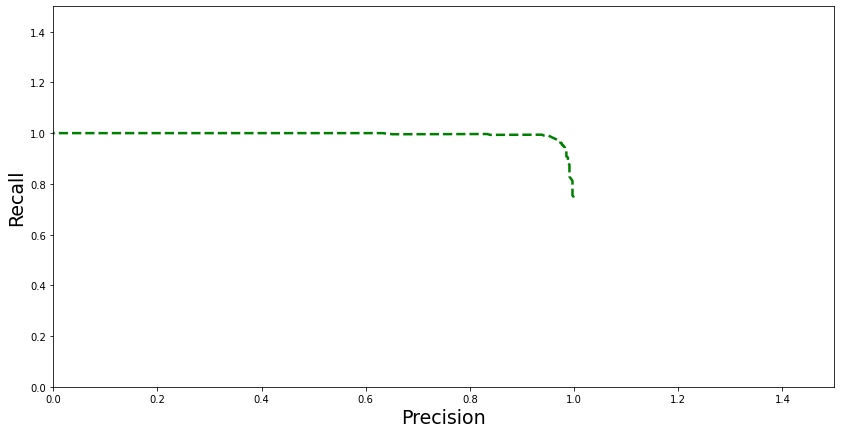

In [ ]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("Recall", fontsize=19)
    plt.xlabel("Precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

**Curva ROC AUC**

Outra forma de avaliar e comparar nosso modelo de classificação é utilizar Curva ROC AUC. Esta curva representa o **recall vs a taxa de falsos positivos** (proporção de instâncias negativas incorretamente classificadas), em vez de traçar a **precision vs recall**.

In [ ]:
from sklearn.metrics import roc_curve
# calcular taxa positiva verdadeira e taxa de falsos positivos
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

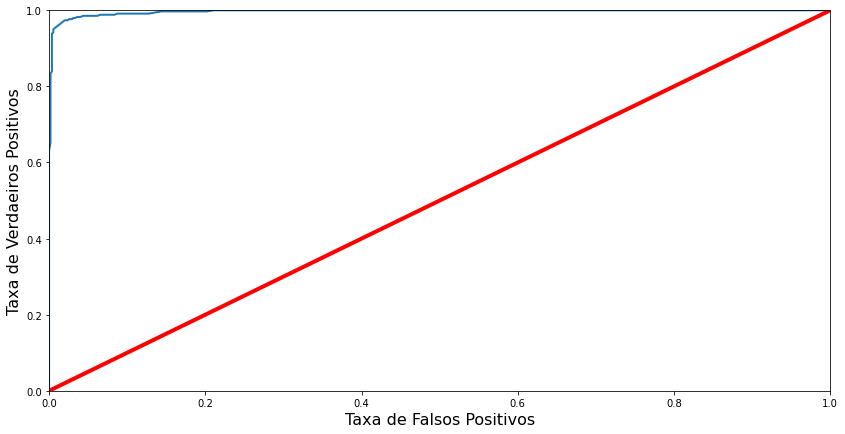

In [ ]:
# plotando  a Curva ROC AUC
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Taxa de Falsos Positivos', fontsize=16)
    plt.ylabel('Taxa de Verdaeiros Positivos', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

A linha vermelha no meio representa um classificador puramente aleatório e, portanto, e o nosso  classificador deve estar o mais longe possível. Nosso modelo Random Forest parece ter se comportado como esperado.

**ROC AUC Score**


A ROC AUC Score é a pontuação correspondente à Curva ROC AUC. É calculado simplesmente medindo a área sob a curva, que é chamada de AUC.

Um classificador 100% correto teria uma pontuação AUC ROC de 1 e um classificador completamente aleatório teria uma pontuação de 0,5.

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9966952140521309


In [ ]:
Y_prediction = random_forest.predict(X_test)

In [ ]:
Y_prediction

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = test_df['PassengerId']
submission_df['Survived'] = Y_prediction
submission_df.to_csv('submissions.csv', header=True, index=False)
submission_df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
